In [1]:
.L ../libAmBe.so

In [2]:
test // Test if lib loaded coorectly

(const int) 11


In [3]:
char const* path {"../dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [4]:
auto df = dataset.df;

In [5]:
auto df2 = filterT1Events(df, 0.001);

In [6]:
df2.Display({"gamma_event", "is_event", "T1.pdg", "T1.energy"})->Print();

+-----+-------------+----------+--------+-----------+
| Row | gamma_event | is_event | T1.pdg | T1.energy | 
+-----+-------------+----------+--------+-----------+
| 0   | 0           | true     | 2112   | 6.9870362 | 
|     | 1           |          | 22     | 4.4400000 | 
+-----+-------------+----------+--------+-----------+
| 1   | 0           | true     | 2112   | 2.6446574 | 
|     | 1           |          | 22     | 4.4400000 | 
+-----+-------------+----------+--------+-----------+
| 2   | 0           | true     | 2112   | 3.0270549 | 
|     | 1           |          | 22     | 4.4400000 | 
+-----+-------------+----------+--------+-----------+
| 3   | 0           | true     | 2112   | 5.5570296 | 
|     | 1           |          | 22     | 4.4400000 | 
+-----+-------------+----------+--------+-----------+
| 4   | 0           | false    | 2112   | 1.1184309 | 
+-----+-------------+----------+--------+-----------+


In [7]:
// Apply filter on df to keep only those vith gamma event
auto df_filtered = df2.Filter("is_event");

In [8]:
// Some statistical consideration
double countEvent = (double) df_filtered.Count().GetValue();
double countTotal = (double) df2.Count().GetValue();
double ratio = countEvent / countTotal;
std::cout << "Number of row with gamma 4.44 event: " << countEvent << std::endl;
std::cout << "Total number of row (number of event): " << countTotal << std::endl;
std::cout << "Ratio: " << ratio << "   Pourcentage of event with gamma: " << ratio * 100. << std::endl;

Number of row with gamma 4.44 event: 86297
Total number of row (number of event): 139586
Ratio: 0.618235   Pourcentage of event with gamma: 61.8235


Ploting the gamma energy distribution in order to check that its realy correspond to a Dirac distribution at 4.44 MeV

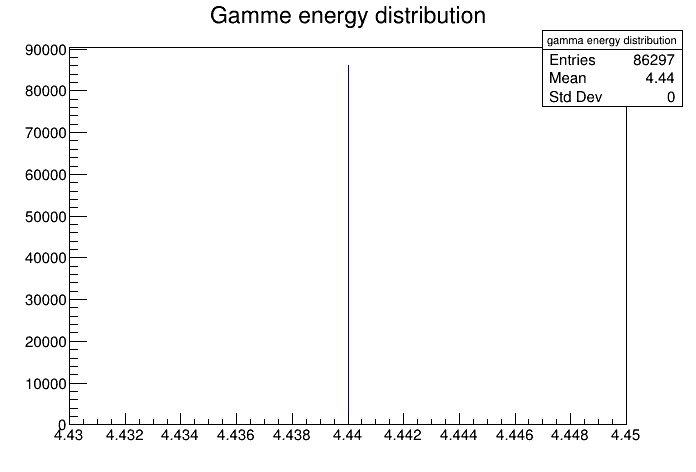

In [9]:
TCanvas c;
auto hist = df_filtered.Define("Gamma_energy", "T1.energy[gamma_event ]")
    .Histo1D({"gamma energy distribution", "Gamme energy distribution", 50000, 4.43, 4.45}, "Gamma_energy")
    ->DrawClone();
c.Draw();

In [11]:
std::string dir {"../plots"};
std::string file {"init_gamma_Edist"};
savePlot(hist, dir, file);

Info in <TCanvas::Print>: pdf file ../plots/pdf/init_gamma_Edist.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/init_gamma_Edist.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/init_gamma_Edist.png has been created
